# Exercises

This notebook contains exercises for section 1.1 of the Medford group graduate student training. These exercises cover basic Python skills.

## Exercise 1

Begin by importing the numpy Python package with the name "np" and the pylab package with the name "plt." Also import the "os" package for reading and writing to files.

In [1]:
import numpy as np
import pylab as plt
import os

In this exercise, you will consider the Collatz conjecture, which is a famous unsolved problem in mathematics that asks whether repeating two simple arithmetic operations will eventually transform every positive integer into 1. <br>
Write a Python **function** that takes any positive integer as an argument. Using loops and conditional statements, perform the following: <br>
* If the integer is even, divide by 2
* If the integer is odd, multiply by 3 and add 1
* Continue until convergence (i.e., the integer becomes 1)
* Output the number of iterations required

In [2]:
def transformer(number):
    number_i = number
    n_iter = 0
    while number != 1:
        if number %2 == 0:
            number = int(number/2)
        elif number %2 != 0:
            number = 3*number +1
        n_iter += 1
    print(f"after {n_iter} iteration, {number_i} has become {number}")
    return number, n_iter

transformer(12)


after 9 iteration, 12 has become 1


(1, 9)

Test your function using each inital guess in the set *S* = [2, 5, 10, 16, 24, 27, 35, 50]. Use Python plotting functions to plot the number of iterations required for each initial guess (i.e., initial guess on the x-axis and iterations on the y-axis). Lastly, save your plot as "Collatz_exercise.png" and write each initial guess with its corresponding number of iterations to a file called "Collatz.out."

after 1 iteration, 2 has become 1
after 5 iteration, 5 has become 1
after 6 iteration, 10 has become 1
after 4 iteration, 16 has become 1
after 10 iteration, 24 has become 1
after 111 iteration, 27 has become 1
after 13 iteration, 35 has become 1
after 24 iteration, 50 has become 1


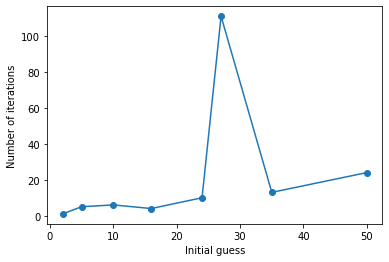

In [3]:
S = [2, 5, 10, 16, 24, 27, 35, 50]

n_iter_list = []
tup_list = []
for guess in S:
    n_iter = transformer(guess)[1]
    n_iter_list.append(n_iter)
    tup_list.append(tuple([guess, n_iter]))

fig, ax = plt.subplots()
ax.scatter(S, n_iter_list)
ax.plot(S, n_iter_list)

ax.set_xlabel('Initial guess')
ax.set_ylabel('Number of iterations')

plt.show()
 
 # Save the plot
fig.savefig('Collatz_exercise.png')
 
 # Create a file containing the plotted values
with open('Collatz.out', 'w') as f:
    for item in tup_list:
        f.write(str(item) + '\n')

## Exercise 2

Write a Python function that takes any string of characters as an argument and displays characters that are present at an even index number. Your function should output an error if an empty string is passed to the function (i.e., use exception handling). As an example, the string "Python" would result in "y h n" being printed to the console.

In [4]:
def print_even(string_in):
    try:
        # Check if the string is empty
        if string_in == "":
            raise ValueError("(Error) An empty string was passed to the function.")
        else:
            string_out = ""
            for index in list(range(len(string_in))):
                if (index+1) % 2 == 0:
                    string_out = string_out + " " + string_in[index] 
            print(string_out[1:])
    except ValueError as e:
        print(e)
        
print_even("Python")
print_even("")

y h n
(Error) An empty string was passed to the function.


Test your function using the following set of strings: *S* = ["Gojackets", "Call me Ishmael", "ILoveChBE"]. Also test your function on an empty string to check your error handling.

In [5]:
S = ["Gojackets", "Call me Ishmael", "ILoveChBE"]
S.append("")

for string_in in S:
    print_even(string_in)

o a k t
a l m   s m e
L v C B
(Error) An empty string was passed to the function.


## Exercise 3

Write a Python function to compute the income tax on a salary of \$58,500 using the following scheme: <br>
* First \$10,000: 0% tax rate
* Next \$15,000: 10% tax rate
* Remaining: 23% tax rate

In [6]:
def get_tax(income):
    tax_thresholds = [10000, 15000]
    tax_rates = [0, 0.1, 0.23]
    tax = 0 
    if income > sum(tax_thresholds):
        income_remain = income - sum(tax_thresholds)
        tax += tax_rates[2] * income_remain
        tax += tax_rates[1] * tax_thresholds[1]
        tax += tax_rates[0] * tax_thresholds[0]
    elif income > tax_thresholds[0]:
        income_remain = income - tax_thresholds[0]
        tax += tax_rates[1] * income_remain
        tax += tax_rates[0] * tax_thresholds[0]
    else:
        tax += tax_rates[0] * tax_thresholds[0]
    
    return tax

get_tax(58500)

9205.0

## Exercise 4

Write a Python function that takes a positive integer and prints each digit from the integer in reverse order. As an example, 6572 would print 2756. Test your function with the set *S* = [1, 15, 658, 2940, 44112].

In [7]:
def print_reverse(number):
    number_string = str(number)
    number_reverse = ""
    for index in list(range(len(number_string)-1,-1,-1)):
        number_reverse += number_string[index]
    print(number_reverse)

print_reverse(6572)

S = [1, 15, 658, 2940, 44112]
for number in S:
    print_reverse(number)


2756
1
51
856
0492
21144


## Exercise 5

Use the Anaconda package manager to download the scikit-learn Python package (https://anaconda.org/anaconda/scikit-learn). Import the "mean_absolute_error" function and calcualte the MAE for the data below.

In [8]:
from sklearn.metrics import mean_absolute_error

x = [-7,1,5,2,9,-2,0,1]
y = [-6,4,4.5,2,11,-2.1,1,3]
MAE = mean_absolute_error(x, y)
print('The MAE is {}'.format(MAE))

The MAE is 1.2
